## Peak detection on real chromatograms

---
**Feel free to do anything with this notebook Emery! I will work on *01_convolutional_neural_network***

In [45]:
import numpy as np
import pandas as pd
import scipy.interpolate
import matplotlib.pyplot as plt
import glob
import sys

sys.path.append('../src/')

from savgol.utils import savgol_filter
from savgol.utils import find_peaks

In [46]:
def apply_interpolation(x, y, target_size):
    '''
    Resizes a chromatogram to a given size/resolution
    '''
    f = scipy.interpolate.interp1d(x, y)
    xnew = np.linspace(x.min(), x.max(), target_size)
    ynew = f(xnew)
    return xnew, ynew

(1.5, 4.5)

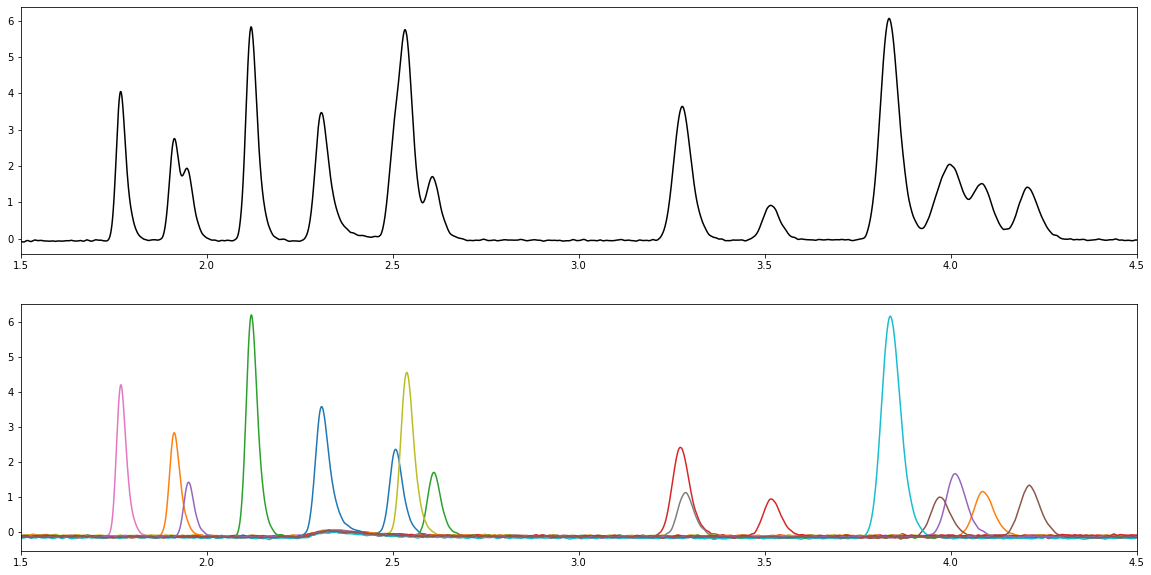

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

folder = '../input/chrom_1'
mode = 'ISO' # or 'GRA'
freq = 10 # or 160

path = f'{folder}/{mode}_ALL_F{freq}.CSV'   # less noisy

data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')

# Obtain absorbance and time column
x = data[1].values
t = data[0].values
# Interpolate to match dim of CNN (optional for non-CNN method)
t, x = apply_interpolation(t, x, 16384)

for c in glob.glob(f'{folder}/{mode}_[0-9]*'):
    peak_data = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    x_peak = peak_data[1].values
    t_peak = peak_data[0].values
    t_peak, x_peak = apply_interpolation(t_peak, x_peak, 16384)
    
    axes[1].plot(t_peak, x_peak)
    

axes[0].plot(t, x, c='black', linestyle='-')
axes[0].set_xlim(1.5, 4.5)
axes[1].set_xlim(1.5, 4.5)

## Peak detection (dummy)

[2898 3130 3201 3472 3781 4151 4275 5369 5759 6280 6551 6694 6890]


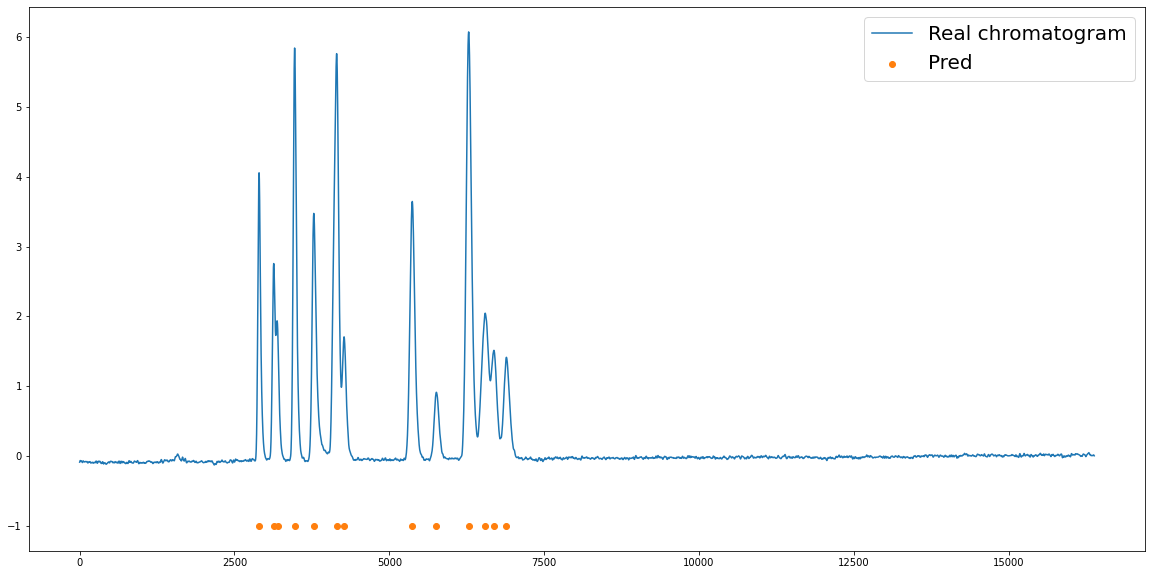

In [55]:
def peak_detection(x):
    x_smooth, x_deriv = savgol_filter(x, 101, 2, 2)
    output = find_peaks(x_deriv, height=0.0001, width=[16, None])
    print(output)
    return output

loc = peak_detection(x)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)